In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import pandas as pd

## Load Important Function

In [2]:
class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)

## Plain MD 

In [3]:
results_trials = []
ntrials = 3
nres = 3
plain_md_path = '../Plain_MD/analysis'

# Load the data
for trial in range(ntrials):
    data = Data.load(f'{plain_md_path}/autocoorel_data/autocorrel_res012_5us_100stride_trial{trial}.pkl').array_list
    results_trials.append(data)

# Determine the minimum length among all (trial, res)
min_len = min(len(res_data) for trial_data in results_trials for res_data in trial_data)
print(f"Minimum length of data across all trials and residues: {min_len}")

# Store truncated results
results = np.zeros((ntrials, nres, min_len))
for trial in range(ntrials):
    for res in range(nres):
        results[trial, res, :] = results_trials[trial][res][:min_len]  # truncate to min_len

# Calculate mean and std
plainmd_results_mean = np.nanmean(results, axis=0)
plainmd_results_std = np.nanstd(results, axis=0)

Minimum length of data across all trials and residues: 203053


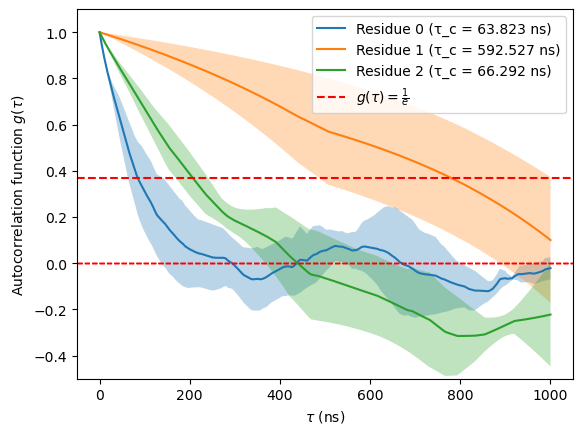

In [4]:
ntau = plainmd_results_mean.shape[1] # 37002
dt_in_ns = 0.010  # 10 ps per step (converted to ns) 
Nmax = 100000
time = np.arange(Nmax) * dt_in_ns  # Time array in ns

plt.figure()

for res in range(nres):
    mean = plainmd_results_mean[res][:Nmax]
    std = plainmd_results_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(time, mean, label=label)
    plt.fill_between(time, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

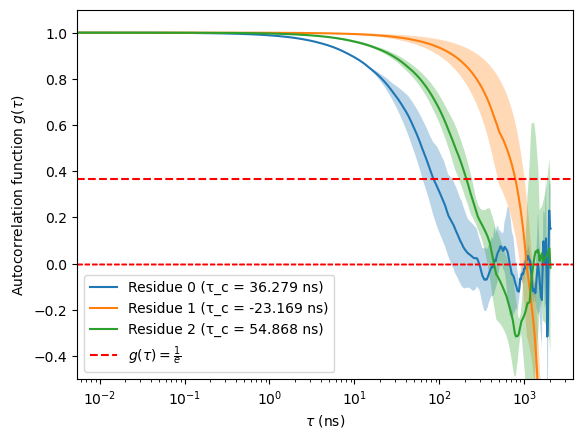

In [5]:
ntau = plainmd_results_mean.shape[1] # 37002
dt_in_ns = 0.010  # 10 ps per step (converted to ns) 
Nmax = min_len
time = np.arange(Nmax) * dt_in_ns  # Time array in ns

plt.figure()

for res in range(nres):
    mean = plainmd_results_mean[res][:Nmax]
    std = plainmd_results_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(time, mean, label=label)
    plt.fill_between(time, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.xscale('log')  # Change x-axis to log scale
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

## EE

In [6]:
ee_path = '../EE/analysis'

# Define number of trials and residues
ntrials = 5
nres = 3  # Number of residues

# Load autocorrelation data from each trial
results_trials = []

for trial in range(ntrials):    
    with open(f'{ee_path}/autocoorel_data/autocorrel_res012_1us_trial{trial}.pkl', 'rb') as f:
        results_trials.append(pickle.load(f))  # Load the stored data

# Determine the maximum `tau` length across all trials
max_ntau = max([len(trial[0]) for trial in results_trials])

# Initialize results array with NaNs (to handle variable-length data)
results = np.full((ntrials, nres, max_ntau), np.nan)

# Store all results, padding shorter arrays with NaN
for trial in range(ntrials):
    for res in range(nres):
        ntau_current = len(results_trials[trial][res])
        results[trial, res, :ntau_current] = results_trials[trial][res]  # Fill valid values

# Compute mean and standard deviation across trials, ignoring NaNs
ee_results_mean = np.nanmean(results, axis=0)  # (nres, max_ntau)
ee_results_std = np.nanstd(results, axis=0)
ee_results_mean.shape

(3, 3000)

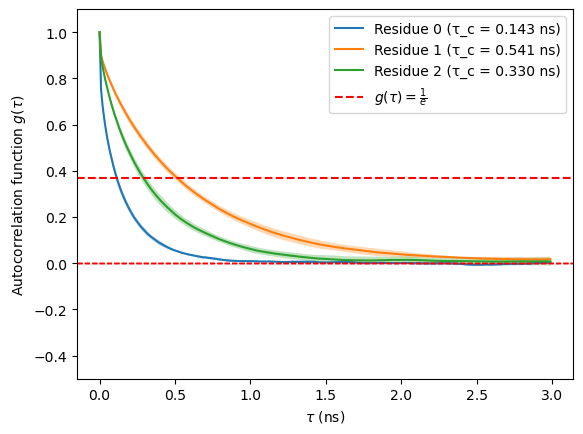

In [7]:
ntau = ee_results_mean.shape[1] # 37002
dt_in_ns = 0.010  # 10 ps per step (converted to ns)
time_to_plot = 3 # in ns 
Nmax = int(time_to_plot / dt_in_ns)  # Convert ns to index\
time = np.arange(Nmax) * dt_in_ns  # Time array in ns

plt.figure()

for res in range(nres):
    mean = ee_results_mean[res][:Nmax]
    std = ee_results_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(time, mean, label=label)
    plt.fill_between(time, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

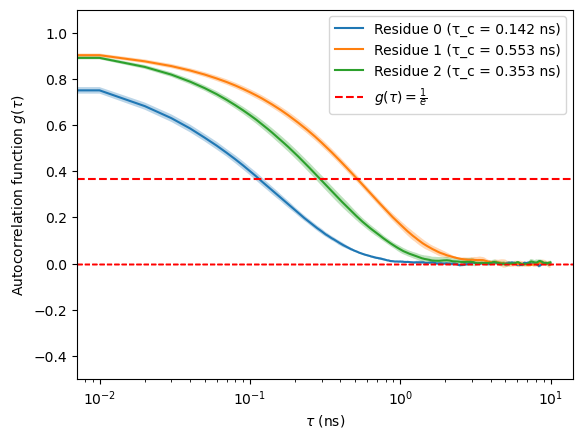

In [8]:
ntau = ee_results_mean.shape[1] # 37002
dt_in_ns = 0.010  # 10 ps per step (converted to ns)
time_to_plot = 10 # in ns 
Nmax = int(time_to_plot / dt_in_ns)  # Convert ns to index\
time = np.arange(Nmax) * dt_in_ns  # Time array in ns

plt.figure()

for res in range(nres):
    mean = ee_results_mean[res][:Nmax]
    std = ee_results_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(time, mean, label=label)
    plt.fill_between(time, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.xscale('log')  # Change x-axis to log scale
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

## HREX

In [9]:
hrex_path = '../HREX/analysis'

# To load it back later
autocorr_results = Data.load(f"{hrex_path}/autocoorel_data/autocoorelation_res_reduced.pkl").array_list
autocorr_results.shape

# Compute mean and standard deviation across trials, ignoring NaNs
hrex_results_mean = np.nanmean(autocorr_results, axis=0)  # (nres, max_ntau)
hrex_results_std = np.nanstd(autocorr_results, axis=0)
hrex_results_mean.shape

(3, 60003)

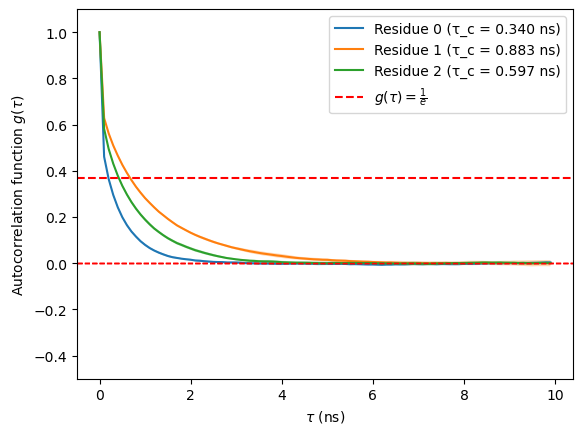

In [10]:
ntau = hrex_results_mean.shape[1] # 60003
dt_in_ns = 0.1  # 10 ps per step (converted to ns)
nres = hrex_results_mean.shape[0]
time_to_plot = 10 # in ns 
Nmax = int(time_to_plot / dt_in_ns)  # Convert ns to index\
time = np.arange(Nmax) * dt_in_ns  # Time array in ns

plt.figure()

for res in range(nres):
    mean = hrex_results_mean[res][:Nmax]
    std = hrex_results_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(time, mean, label=label)
    plt.fill_between(time, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

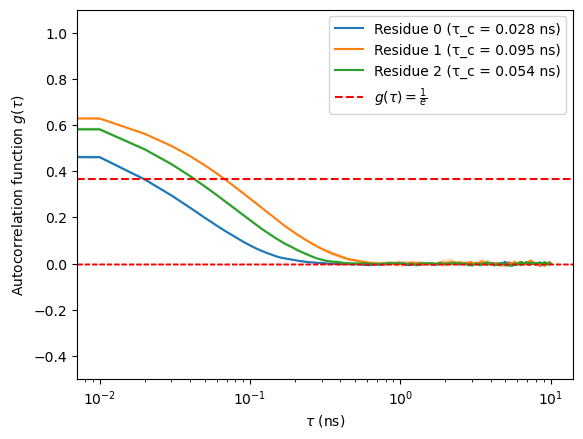

In [11]:
ntau = hrex_results_mean.shape[1] # 37002
dt_in_ns = 0.010  # 10 ps per step (converted to ns)
time_to_plot = 10 # in ns 
Nmax = int(time_to_plot / dt_in_ns)  # Convert ns to index\
time = np.arange(Nmax) * dt_in_ns  # Time array in ns

plt.figure()

for res in range(nres):
    mean = hrex_results_mean[res][:Nmax]
    std = hrex_results_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(time, mean, label=label)
    plt.fill_between(time, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.xscale('log')  # Change x-axis to log scale
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

## REDs

In [12]:
reds_path = '../REDs/analysis'

# To load it back later
autocorr_results = Data.load(f"{reds_path}/autocoorel_data/autocoorelation_res.pkl").array_list
autocorr_results.shape

# Compute mean and standard deviation across trials, ignoring NaNs
reds_results_mean = np.nanmean(autocorr_results, axis=0)  # (nres, max_ntau)
reds_results_std = np.nanstd(autocorr_results, axis=0)
reds_results_mean.shape

(3, 337514)

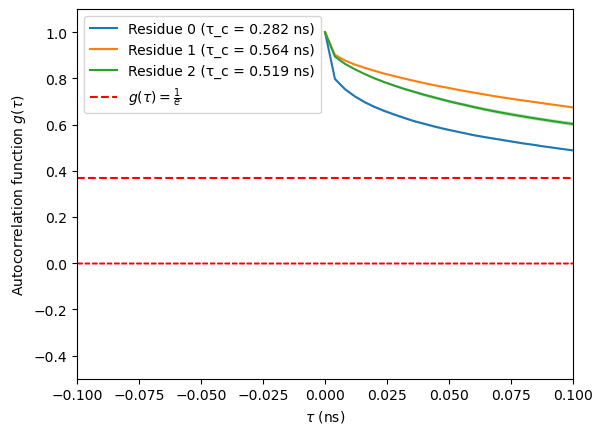

In [13]:
ntau = reds_results_mean.shape[1] # 37002
dt_in_ns = 0.004  # 10 ps per step (converted to ns)
time_to_plot = 4 # in ns 
Nmax = int(time_to_plot / dt_in_ns)  # Convert ns to index\
time = np.arange(Nmax) * dt_in_ns  # Time array in ns

plt.figure()

for res in range(nres):
    mean = reds_results_mean[res][:Nmax]
    std = reds_results_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(time, mean, label=label)
    plt.fill_between(time, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlim(-0.1, 0.1)
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

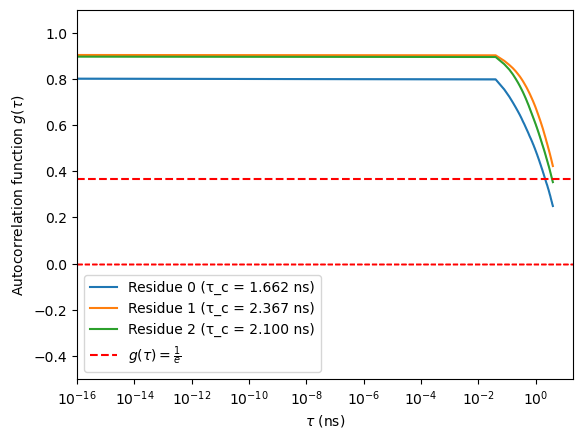

In [14]:
ntau = reds_results_mean.shape[1] # 37002
dt_in_ns = 0.04  # 10 ps per step (converted to ns)
time_to_plot = 4 # in ns 
Nmax = int(time_to_plot / dt_in_ns)  # Convert ns to index\
time = np.arange(Nmax) * dt_in_ns  # Time array in ns

plt.figure()

for res in range(nres):
    mean = reds_results_mean[res][:Nmax]
    std = reds_results_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(time, mean, label=label)
    plt.fill_between(time, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlim(1e-16, 20)
plt.xlabel(r'$\tau$ (ns)')
plt.xscale('log')  # Change x-axis to log scale
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

## Metadynamics

In [15]:
metadynamics_path = '../Metadynamics/analysis/autocooreldata'

### omg

In [16]:
methods_path = f"{metadynamics_path}/autocoorel_data_omg"

# To load it back later
meta_omg_results = Data.load(f"{methods_path}/autocoorelation_res_reduced.pkl").array_list


meta_omg_results.shape

data_instance = Data(meta_omg_results[:, :250000])
data_instance.save(f"{methods_path}/autocoorelation_res_reduced.pkl")

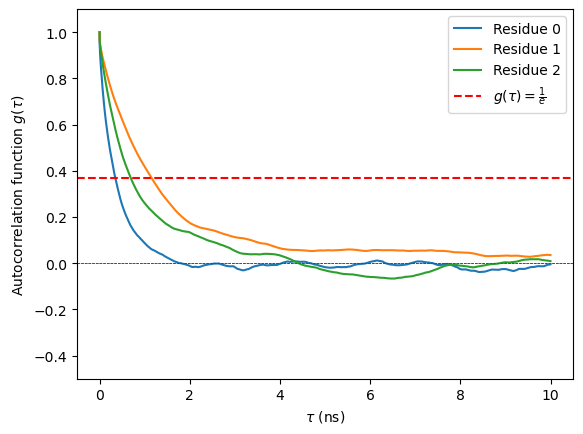

In [17]:
residues = [0, 1, 2]
nreplicas = 6
Nmax = 25000  # Maximum number of steps to display in plots
dt_in_ns = 0.0004  # 1 ps per step (converted to ns) YES????
tau_c_values = []

plt.figure()

for res in residues:
    
    g = meta_omg_results[res]
    tau_c = np.sum(g[0:Nmax])
    tau_c_values.append(tau_c * dt_in_ns)

    plt.plot(np.arange(Nmax) * dt_in_ns, g[:Nmax], label=f'Residue {res}')
    plt.axhline(0, color='r', linestyle='--', linewidth=0.5)  # Horizontal zero line

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')



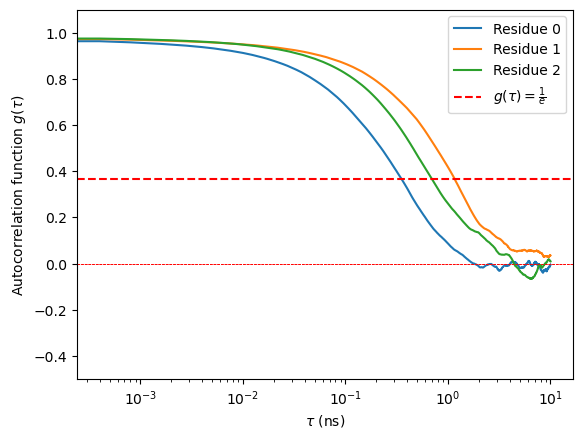

In [18]:
residues = [0, 1, 2]
nreplicas = 6
Nmax = 25000  # Maximum number of steps to display in plots
dt_in_ns = 0.0004  # 1 ps per step (converted to ns) YES????
tau_c_values = []

plt.figure()

for res in residues:
    
    g = meta_omg_results[res]
    tau_c = np.sum(g[0:Nmax])
    tau_c_values.append(tau_c * dt_in_ns)

    plt.plot(np.arange(Nmax) * dt_in_ns, g[:Nmax], label=f'Residue {res}')
    plt.axhline(0, color='r', linestyle='--', linewidth=0.5)  # Horizontal zero line

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xscale('log')  # Change x-axis to log scale
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')



### oph

In [19]:
methods_path = f"{metadynamics_path}/autocoorel_data_oph"

# To load it back later
meta_oph_results = Data.load(f"{methods_path}/autocoorelation_res_reduced.pkl").array_list

data_instance = Data(meta_oph_results[:, :250000])
data_instance.save(f"{methods_path}/autocoorelation_res_reduced.pkl")

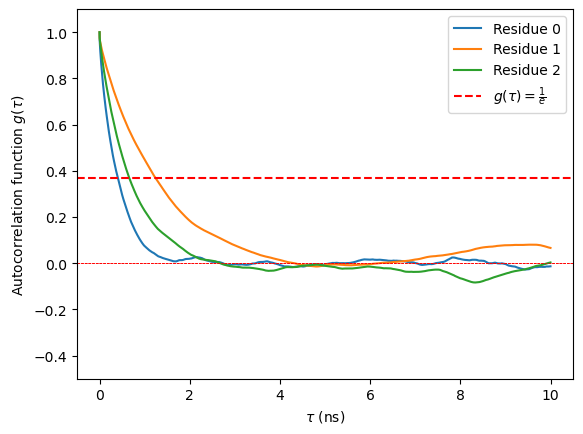

In [20]:
residues = [0, 1, 2]
nreplicas = 6
Nmax = 25000  # Maximum number of steps to display in plots
dt_in_ns = 0.0004  # 1 ps per step (converted to ns) YES????
tau_c_values = []

plt.figure()

for res in residues:
    
    g = meta_oph_results[res]
    tau_c = np.sum(g[0:Nmax])
    tau_c_values.append(tau_c * dt_in_ns)

    plt.plot(np.arange(Nmax) * dt_in_ns, g[:Nmax], label=f'Residue {res}')
    plt.axhline(0, color='r', linestyle='--', linewidth=0.5)  # Horizontal zero line

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')



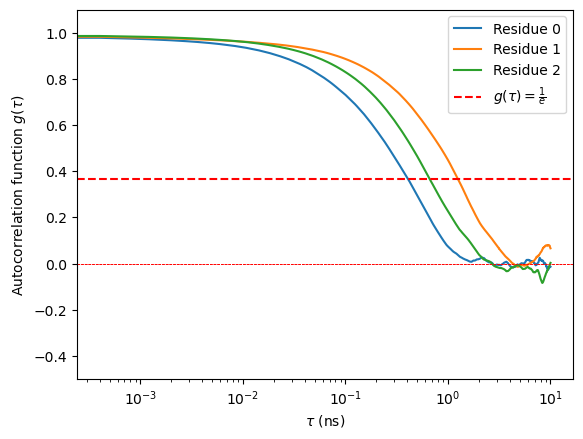

In [21]:
residues = [0, 1, 2]
nreplicas = 6
Nmax = 25000  # Maximum number of steps to display in plots
dt_in_ns = 0.0004  # 1 ps per step (converted to ns) YES????
tau_c_values = []

plt.figure()

for res in residues:
    
    g = meta_oph_results[res]
    tau_c = np.sum(g[0:Nmax])
    tau_c_values.append(tau_c * dt_in_ns)

    plt.plot(np.arange(Nmax) * dt_in_ns, g[:Nmax], label=f'Residue {res}')
    plt.axhline(0, color='r', linestyle='--', linewidth=0.5)  # Horizontal zero line

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xscale('log')  # Change x-axis to log scale
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')



### opp

In [22]:
methods_path = f"{metadynamics_path}/autocoorel_data_opp"

# To load it back later
meta_opp_results = Data.load(f"{methods_path}/autocoorelation_res_reduced.pkl").array_list


data_instance = Data(meta_opp_results[:, :250000])
data_instance.save(f"{methods_path}/autocoorelation_res_reduced.pkl")

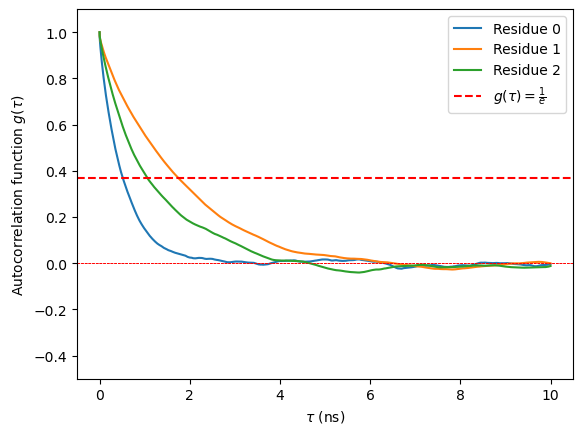

In [23]:
residues = [0, 1, 2]
nreplicas = 6
Nmax = 25000  # Maximum number of steps to display in plots
dt_in_ns = 0.0004  # 1 ps per step (converted to ns) YES????
tau_c_values = []

plt.figure()

for res in residues:
    
    g = meta_opp_results[res]
    tau_c = np.sum(g[0:Nmax])
    tau_c_values.append(tau_c * dt_in_ns)

    plt.plot(np.arange(Nmax) * dt_in_ns, g[:Nmax], label=f'Residue {res}')
    plt.axhline(0, color='r', linestyle='--', linewidth=0.5)  # Horizontal zero line

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')



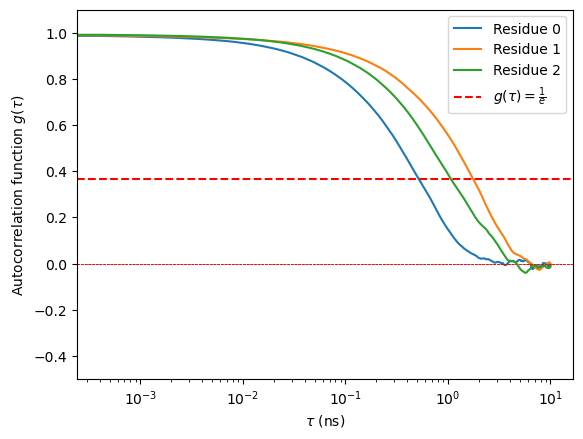

In [24]:
residues = [0, 1, 2]
nreplicas = 6
Nmax = 25000  # Maximum number of steps to display in plots
dt_in_ns = 0.0004  # 1 ps per step (converted to ns) YES????
tau_c_values = []

plt.figure()

for res in residues:
    
    g = meta_opp_results[res]
    tau_c = np.sum(g[0:Nmax])
    tau_c_values.append(tau_c * dt_in_ns)

    plt.plot(np.arange(Nmax) * dt_in_ns, g[:Nmax], label=f'Residue {res}')
    plt.axhline(0, color='r', linestyle='--', linewidth=0.5)  # Horizontal zero line

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xscale('log')  # Change x-axis to log scale
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')



### oppc

In [25]:
methods_path = f"{metadynamics_path}/autocoorel_data_oppc"

# To load it back later
meta_oppc_results = Data.load(f"{methods_path}/autocoorelation_res_reduced.pkl").array_list

data_instance = Data(meta_oppc_results[:, :250000])
data_instance.save(f"{methods_path}/autocoorelation_res_reduced.pkl")

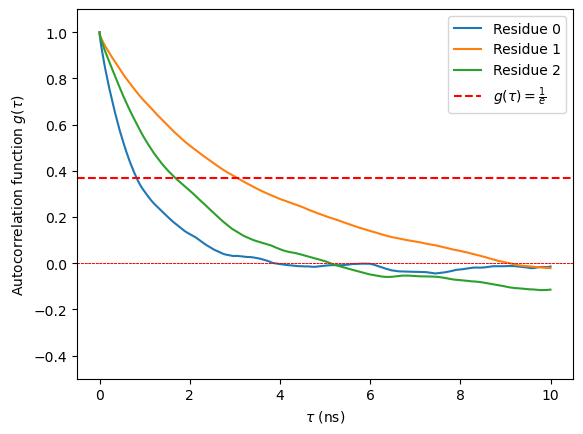

In [26]:
residues = [0, 1, 2]
nreplicas = 6
Nmax = 25000  # Maximum number of steps to display in plots
dt_in_ns = 0.0004  # 1 ps per step (converted to ns) YES????
tau_c_values = []

plt.figure()

for res in residues:
    
    g = meta_oppc_results[res]
    tau_c = np.sum(g[0:Nmax])
    tau_c_values.append(tau_c * dt_in_ns)

    plt.plot(np.arange(Nmax) * dt_in_ns, g[:Nmax], label=f'Residue {res}')
    plt.axhline(0, color='r', linestyle='--', linewidth=0.5)  # Horizontal zero line

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')



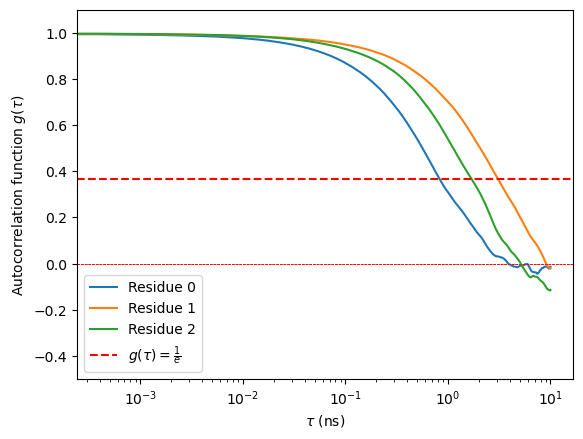

In [27]:
residues = [0, 1, 2]
nreplicas = 6
Nmax = 25000  # Maximum number of steps to display in plots
dt_in_ns = 0.0004  # 1 ps per step (converted to ns) YES????
tau_c_values = []

plt.figure()

for res in residues:
    
    g = meta_oppc_results[res]
    tau_c = np.sum(g[0:Nmax])
    tau_c_values.append(tau_c * dt_in_ns)

    plt.plot(np.arange(Nmax) * dt_in_ns, g[:Nmax], label=f'Residue {res}')
    plt.axhline(0, color='r', linestyle='--', linewidth=0.5)  # Horizontal zero line

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xscale('log')  # Change x-axis to log scale
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')



### omg8rep

In [28]:
methods_path = f"{metadynamics_path}/autocoorel_data_omg8rep"

# To load it back later
meta_omg8rep_results = []
for i in range(8):
    meta_omg8rep_single_result = Data.load(f"{methods_path}/autocoorelation_res{i}.pkl").array_list
    meta_omg8rep_results.append(meta_omg8rep_single_result)

meta_omg8rep_results = np.array(meta_omg8rep_results)
print('meta_omg8rep_results.shape', meta_omg8rep_results.shape)

meta_omg8rep_mean = np.mean(meta_omg8rep_results, axis=0)
meta_omg8rep_std = np.std(meta_omg8rep_results, axis=0)

meta_omg8rep_results.shape (8, 3, 205058)


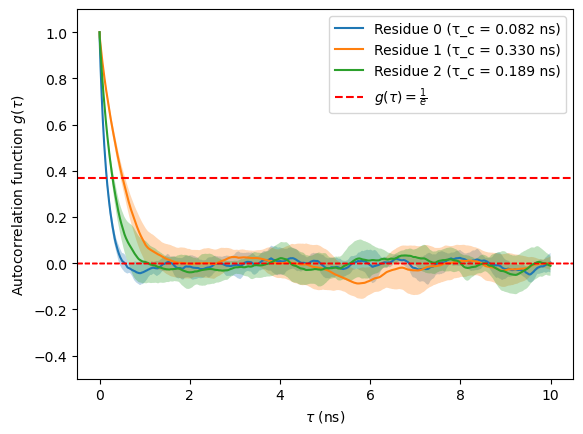

In [29]:
residues = [0, 1, 2]
nreplicas = 6
Nmax = 25000  # Maximum number of steps to display in plots
dt_in_ns = 0.0004  # 1 ps per step (converted to ns) YES????
tau_c_values = []

plt.figure()

for res in range(nres):
    mean = meta_omg8rep_mean[res][:Nmax]
    std = meta_omg8rep_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(np.arange(Nmax) * dt_in_ns, mean, label=label)
    plt.fill_between(np.arange(Nmax) * dt_in_ns, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

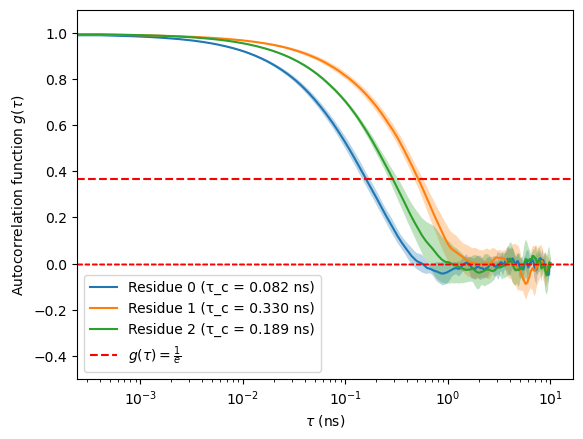

In [30]:
residues = [0, 1, 2]
nreplicas = 6
Nmax = 25000  # Maximum number of steps to display in plots
dt_in_ns = 0.0004  # 1 ps per step (converted to ns) YES????
tau_c_values = []

plt.figure()

for res in range(nres):
    mean = meta_omg8rep_mean[res][:Nmax]
    std = meta_omg8rep_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(np.arange(Nmax) * dt_in_ns, mean, label=label)
    plt.fill_between(np.arange(Nmax) * dt_in_ns, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xscale('log')  # Change x-axis to log scale
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

### oppc8rep

In [31]:
methods_path = f"{metadynamics_path}/autocoorel_data_oppc8rep"

# To load it back later
meta_oppc8rep_results = []
for i in range(8):
    meta_oppc8rep_single_result = Data.load(f"{methods_path}/autocoorelation_res{i}.pkl").array_list
    meta_oppc8rep_results.append(meta_oppc8rep_single_result)

meta_oppc8rep_results = np.array(meta_oppc8rep_results)
print('meta_oppc8rep_results.shape', meta_oppc8rep_results.shape)

meta_oppc8rep_mean = np.mean(meta_oppc8rep_results, axis=0)
meta_oppc8rep_std = np.std(meta_oppc8rep_results, axis=0)

meta_oppc8rep_results.shape (8, 3, 207776)


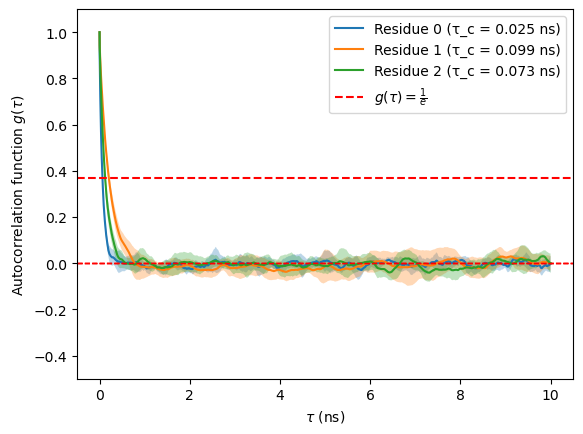

In [32]:
residues = [0, 1, 2]
nreplicas = 6
Nmax = 25000  # Maximum number of steps to display in plots
dt_in_ns = 0.0004  # 1 ps per step (converted to ns) YES????
tau_c_values = []

plt.figure()

for res in range(nres):
    mean = meta_oppc8rep_mean[res][:Nmax]
    std = meta_oppc8rep_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(np.arange(Nmax) * dt_in_ns, mean, label=label)
    plt.fill_between(np.arange(Nmax) * dt_in_ns, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

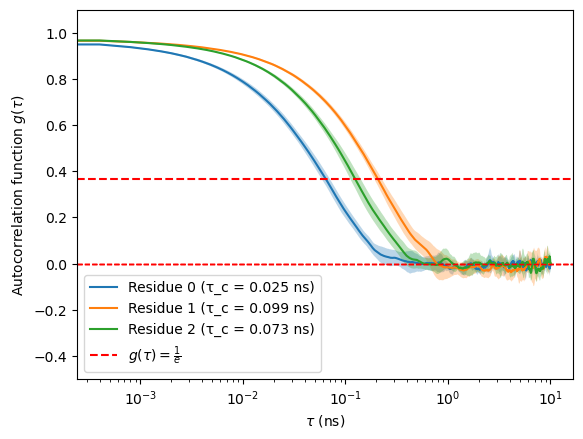

In [33]:
residues = [0, 1, 2]
nreplicas = 6
Nmax = 25000  # Maximum number of steps to display in plots
dt_in_ns = 0.0004  # 1 ps per step (converted to ns) YES????
tau_c_values = []

plt.figure()

for res in range(nres):
    mean = meta_oppc8rep_mean[res][:Nmax]
    std = meta_oppc8rep_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(np.arange(Nmax) * dt_in_ns, mean, label=label)
    plt.fill_between(np.arange(Nmax) * dt_in_ns, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xscale('log')  # Change x-axis to log scale
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

## Combine Plot 

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# --- Colormap dictionaries for each residue (same template) ---
colormaps = {
    0: get_cmap('viridis'),
    1: get_cmap('viridis'),
    2: get_cmap('viridis')
}

# --- Build simulation list (extend your template) ---
# Assumes the following variables already exist in your environment:
# plainmd_results_mean/std, ee_results_mean/std, hrex_results_mean/std, reds_results_mean/std,
# meta_omg_results, meta_oph_results, meta_opp_results, meta_oppc_results,
# meta_omg8rep_mean/std, meta_oppc8rep_mean/std, and min_len (frames for plainMD plot window).

def as_stack_from_listlike_per_res(res_arrays, nres=3):
    """Make a (nres, ntau) numpy array from per-residue lists/arrays with potentially different lengths by padding with NaN."""
    max_len = max(len(res_arrays[r]) for r in range(nres))
    out = np.full((nres, max_len), np.nan, dtype=float)
    for r in range(nres):
        arr = np.asarray(res_arrays[r], dtype=float)
        out[r, :len(arr)] = arr
    return out

simulations = [
    {
        'name': 'plainMD',
        'mean': plainmd_results_mean,     # (nres, ntau)
        'std':  plainmd_results_std,      # (nres, ntau)
        'dt': 0.010,
        'time_to_plot': float(min_len) * 0.010  # min_len is in frames
    },
    {
        'name': 'EE',
        'mean': ee_results_mean,
        'std':  ee_results_std,
        'dt': 0.010,
        'time_to_plot': 10.0
    },
    {
        'name': 'HREX',
        'mean': hrex_results_mean,
        'std':  hrex_results_std,
        'dt': 0.010,
        'time_to_plot': 10.0
    },
    {
        'name': 'REDS',
        'mean': reds_results_mean,
        'std':  reds_results_std,
        'dt': 0.004,
        'time_to_plot': 10.0
    },
    # ---- Meta variants without per-trial std (single-run) ----
    {
        'name': 'meta_omg',
        'mean': as_stack_from_listlike_per_res([meta_omg_results[r] for r in range(3)]),
        'std':  None,
        'dt': 0.0004,
        'time_to_plot': 10.0
    },
    {
        'name': 'meta_oph',
        'mean': as_stack_from_listlike_per_res([meta_oph_results[r] for r in range(3)]),
        'std':  None,
        'dt': 0.0004,
        'time_to_plot': 10.0
    },
    {
        'name': 'meta_opp',
        'mean': as_stack_from_listlike_per_res([meta_opp_results[r] for r in range(3)]),
        'std':  None,
        'dt': 0.0004,
        'time_to_plot': 10.0
    },
    {
        'name': 'meta_oppc',
        'mean': as_stack_from_listlike_per_res([meta_oppc_results[r] for r in range(3)]),
        'std':  None,
        'dt': 0.0004,
        'time_to_plot': 10.0
    },
    # ---- Meta 8-rep (has mean/std) ----
    {
        'name': 'meta_omg8rep',
        'mean': meta_omg8rep_mean,
        'std':  meta_omg8rep_std,
        'dt': 0.0004,
        'time_to_plot': 10.0
    },
    {
        'name': 'meta_oppc8rep',
        'mean': meta_oppc8rep_mean,
        'std':  meta_oppc8rep_std,
        'dt': 0.0004,
        'time_to_plot': 10.0
    },
]


/var/folders/d8/y2dvs1ln1gjcwccrkvtffr240000gn/T/ipykernel_22544/2648186734.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  0: get_cmap('viridis'),
/var/folders/d8/y2dvs1ln1gjcwccrkvtffr240000gn/T/ipykernel_22544/2648186734.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  1: get_cmap('viridis'),
/var/folders/d8/y2dvs1ln1gjcwccrkvtffr240000gn/T/ipykernel_22544/2648186734.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  2: get_cmap('viridis')


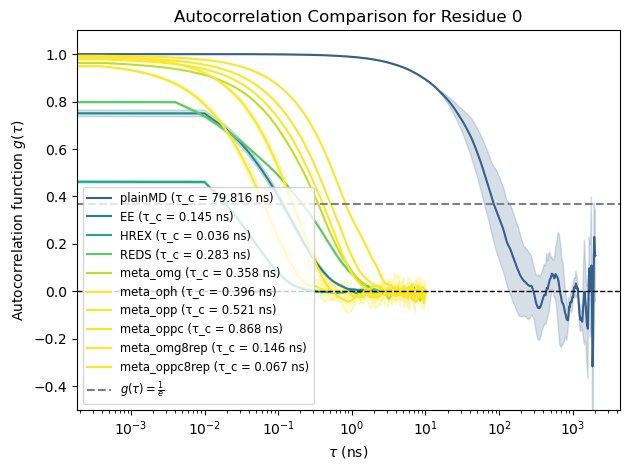

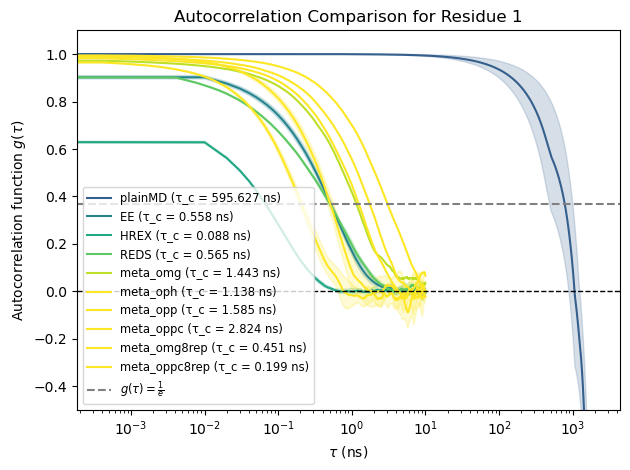

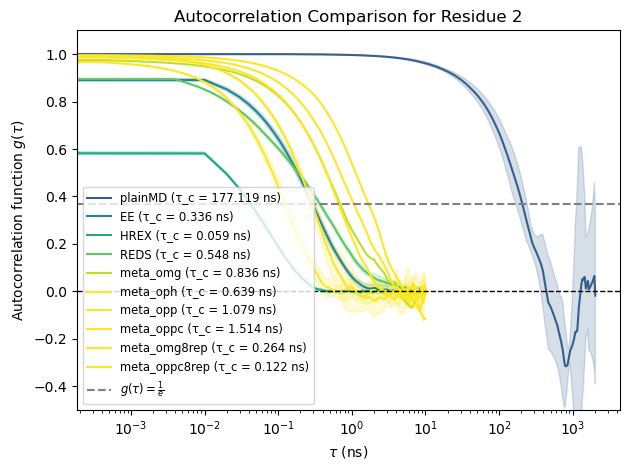

In [41]:
# --- Plot each residue across all simulations (exactly like your template) ---
nres = 3
threshold = 0.001  # Stop integration when |mean| <= threshold

for res in range(nres):  # residue 0, 1, 2
    cmap = colormaps[res]
    plt.figure()

    for i, sim in enumerate(simulations):
        Nwin = int(sim['time_to_plot'] / sim['dt'])
        ntau_res = np.count_nonzero(~np.isnan(sim['mean'][res]))
        Nmax = min(Nwin, ntau_res)
        if Nmax <= 0:
            continue

        time = np.arange(Nmax) * sim['dt']
        mean = np.asarray(sim['mean'][res][:Nmax], dtype=float)

        std = None
        if sim['std'] is not None:
            std = np.asarray(sim['std'][res][:Nmax], dtype=float)

        # Replace NaNs with 0
        mean = np.nan_to_num(mean, nan=0.0)
        if std is not None:
            std = np.nan_to_num(std, nan=0.0)

        # Find first index where correlation is within ±threshold
        cut_idx = np.where(np.abs(mean) <= threshold)[0]
        if cut_idx.size > 0:
            Ncut = cut_idx[0]
        else:
            Ncut = Nmax  # No cutoff found, integrate full

        # Integrated correlation time
        tau_c = np.sum(mean[:Ncut]) * sim['dt']

        label = f"{sim['name']} (τ_c = {tau_c:.3f} ns)"
        color = cmap(0.3 + 0.15 * i)

        plt.plot(time, mean, label=label, color=color)
        if std is not None:
            plt.fill_between(time, mean - std, mean + std, color=color, alpha=0.2)

    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axhline(y=1 / np.e, color='gray', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')

    plt.ylim(-0.5, 1.1)
    plt.xlabel(r'$\tau$ (ns)')
    plt.ylabel(r'Autocorrelation function $g(\tau)$')
    plt.xscale('log')
    plt.title(f'Autocorrelation Comparison for Residue {res}')
    plt.legend(loc='best', fontsize='small')
    plt.tight_layout()

plt.show()


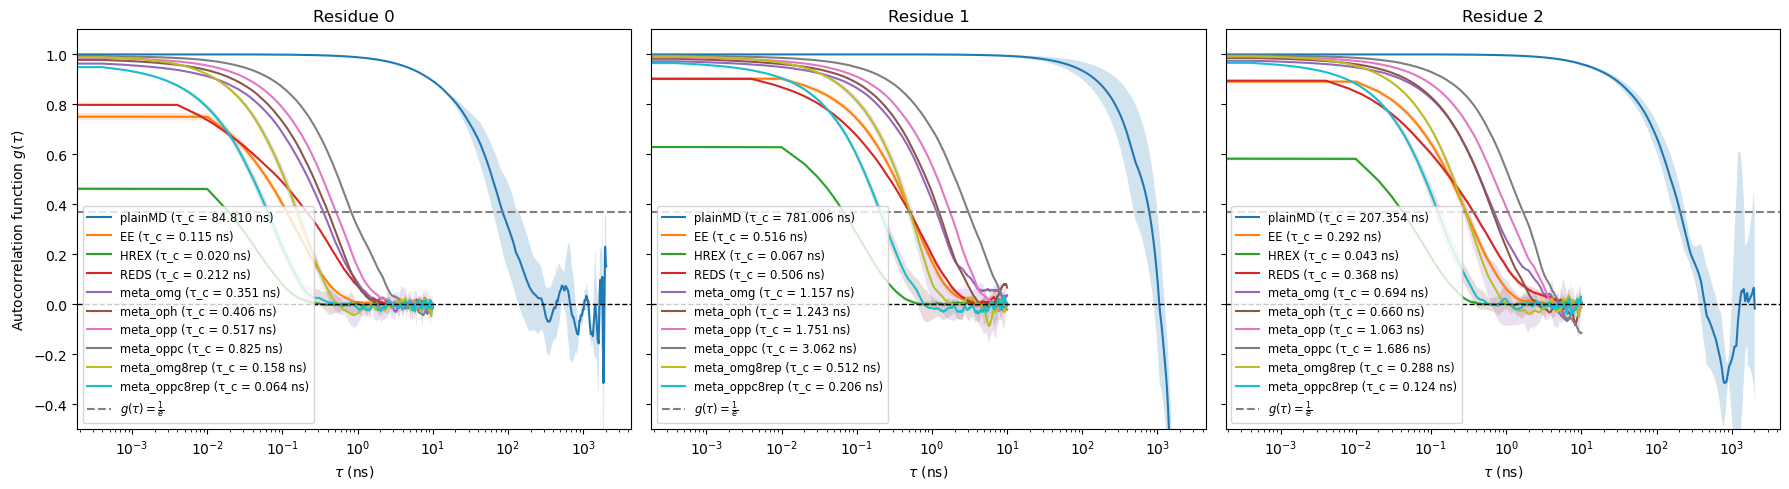

In [44]:
nres = 3
threshold = 1/np.e  # Stop integration when |mean| <= threshold

fig, axes = plt.subplots(1, nres, figsize=(18, 5), sharey=True)

for res in range(nres):  # residue 0, 1, 2
    ax = axes[res]
    cmap = colormaps[res]

    for i, sim in enumerate(simulations):
        Nwin = int(sim['time_to_plot'] / sim['dt'])
        ntau_res = np.count_nonzero(~np.isnan(sim['mean'][res]))
        Nmax = min(Nwin, ntau_res)
        if Nmax <= 0:
            continue

        time = np.arange(Nmax) * sim['dt']
        mean = np.asarray(sim['mean'][res][:Nmax], dtype=float)

        std = None
        if sim['std'] is not None:
            std = np.asarray(sim['std'][res][:Nmax], dtype=float)

        # Replace NaNs with 0
        mean = np.nan_to_num(mean, nan=0.0)
        if std is not None:
            std = np.nan_to_num(std, nan=0.0)

        # Find first index where correlation is within ±threshold at 1/e
        cut_idx = np.where(mean <= threshold)[0]
        if cut_idx.size > 0:
            i = cut_idx[0]
            if i == 0:
                tau_c = time[0]
            else:
                x0, y0 = time[i-1], mean[i-1]
                x1, y1 = time[i], mean[i]
                tau_c = x0 + (threshold - y0) * (x1 - x0) / (y1 - y0)  # cut a linear interpolation around 1/e
        else:
            tau_c = np.nan

        label = f"{sim['name']} (τ_c = {tau_c:.3f} ns)"
        color = cmap(0.3 + 0.15 * i)

        ax.plot(time, mean, label=label)
        if std is not None:
            ax.fill_between(time, mean - std, mean + std, alpha=0.2)

    ax.axhline(0, color='black', linestyle='--', linewidth=1)
    ax.axhline(y=1 / np.e, color='gray', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
    ax.set_ylim(-0.5, 1.1)
    ax.set_xlabel(r'$\tau$ (ns)')
    ax.set_xscale('log')
    ax.set_title(f'Residue {res}')

    if res == 0:
        ax.set_ylabel(r'Autocorrelation function $g(\tau)$')
    ax.legend(loc='best', fontsize='small')

plt.tight_layout()
plt.savefig("fig/autocoor_all_plot.pdf", format="pdf")
plt.show()
